## Step 1: Entropy CSV Description / Format
This notebook describes what the import data will look like, and how difference entropy / distance functions perform on them.

In [1]:
from utils.file_handling import *
import pandas as pd
import numpy as np

# Entropy Parameters
csv_file_name = 'cartpole'
episodes = -1
action_value_name = 'action_value_action_0'
state_value_name = 'state_values'


action_state_data_path = get_absolute_path('data', directory_file_hint=csv_file_name, ignore_files=False)
print(action_state_data_path)
pre_data = pd.read_csv(action_state_data_path, index_col=None)

/Users/jlaivins/PycharmProjects/composite-Action-Extractor/composite_action_extractor/data/entropies_cartpole.csv


In [2]:
pre_data[:10]

,index,step,entropy_action_0_entropy_permutation,entropy_action_0_entropy_kolmogorov,entropy_action_0_entropy_shannon,entropy_action_0_entropy_sklearn_base,entropy_action_0_entropy_sklearn_kl_divergence,entropy_action_0_entropy_sampen,entropy_state_entropy_permutation,entropy_state_entropy_kolmogorov,entropy_state_entropy_shannon,entropy_state_entropy_sklearn_base,entropy_state_entropy_sklearn_kl_divergence,entropy_state_entropy_sampen,action_value_action_0,state_values,episode
0,0,0,1.0,1.000000,1.000000,2.386294,1.049857,2.098612,1.000000,1.202733,3.0,2.385329,1.000554,1.549306,0.0,[-0.011572 -0.176151 0.011791 0.285079],30
1,1,1,1.0,1.056633,1.811278,2.332179,1.043692,inf,1.193426,1.202733,3.0,2.385907,1.000727,1.549306,0.0,[-0.015095 -0.371439 0.017492 0.581458],30
2,2,2,1.0,1.405465,2.000000,2.329661,1.038626,1.000000,1.193426,1.202733,3.0,2.385944,1.000543,1.549306,0.0,[-0.022524 -0.566802 0.029122 0.879599],30
3,3,3,1.0,1.056633,1.811278,2.351784,1.034510,inf,1.000000,1.202733,3.0,2.385440,1.000002,1.549306,0.0,[-0.03386 -0.762307 0.046714 1.181293],30
4,4,4,1.0,1.000000,1.000000,2.386294,1.000000,2.098612,1.000000,1.202733,3.0,2.385452,1.000002,1.549306,1.0,[-0.049106 -0.567822 0.07034 0.903612],30
5,5,5,1.0,1.000000,1.000000,2.386294,1.000000,2.098612,1.096713,1.202733,3.0,2.385448,1.000002,1.549306,1.0,[-0.060462 -0.373719 0.088412 0.633841],30
6,6,6,1.0,1.000000,1.000000,2.386294,1.000000,2.098612,1.193426,1.202733,3.0,2.385425,1.000003,1.549306,1.0,[-0.067937 -0.179935 0.101089 0.370259],30
7,7,7,1.0,1.000000,1.000000,2.386294,1.000000,2.098612,1.096713,1.202733,3.0,2.385378,1.000004,1.549306,1.0,[-0.071535 0.013617 0.108494 0.111084],30
8,8,8,1.0,1.000000,1.000000,2.386294,1.000000,2.098612,1.000000,1.202733,3.0,2.385303,1.000006,1.549306,1.0,[-0.071263 0.20703 0.110715 -0.145496],30
9,9,9,1.0,1.000000,1.000000,2.386294,1.000000,2.098612,1.000000,1.202733,3.0,2.385188,1.000010,1.549306,1.0,[-0.067123 0.400407 0.107806 -0.401301],30


## Step 2: Episode Selection

In [3]:
pre_data['episode'].unique()

array([ 30, 124, 136, 142, 147, 149])

In [4]:
selected_episodes = pre_data['episode'].unique()[episodes]  # Either do [some index] or [:]
selected_episodes = [selected_episodes] if np.isscalar(selected_episodes) else selected_episodes

In [5]:
selected_episodes

[149]

## Step 3: Value Extraction

In [6]:
data = pre_data[[action_value_name, state_value_name, 'episode']]
data = data[data['episode'].isin(selected_episodes)]

In [7]:
data[:20]

,action_value_action_0,state_values,episode
229,0.0,[-0.000961 -0.185134 0.035668 0.298431],149
230,1.0,[-0.004664 0.009462 0.041637 0.017208],149
231,1.0,[-0.004475 0.203963 0.041981 -0.262053],149
232,0.0,[-0.000395 0.008267 0.03674 0.04357 ],149
233,1.0,[-2.299436e-04 2.028438e-01 3.761151e-02 -2....,149
234,0.0,[0.003827 0.007205 0.032866 0.067007],149
235,1.0,[ 0.003971 0.201841 0.034206 -0.215128],149
236,0.0,[0.008008 0.006247 0.029903 0.088145],149
237,1.0,[ 0.008133 0.200928 0.031666 -0.194955],149
238,0.0,[0.012151 0.005368 0.027767 0.107547],149


In [8]:
data_episodes = []
for episode in selected_episodes:
    data_episodes.append(data[data['episode'] == episode].copy())

## Step 4: Action Values

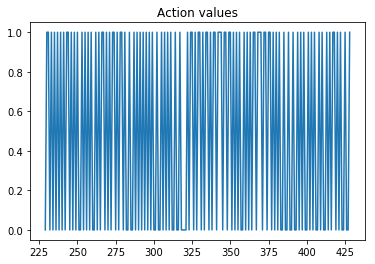

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

for data_episode in data_episodes:
    plt.plot(data_episode[action_value_name])
    plt.title('Action values')
    plt.show()

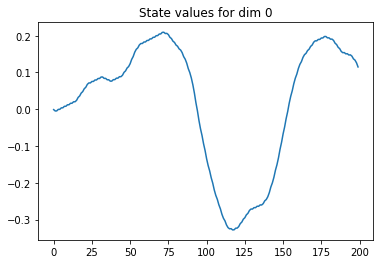

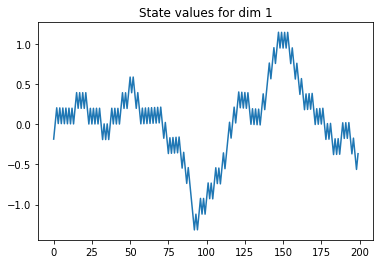

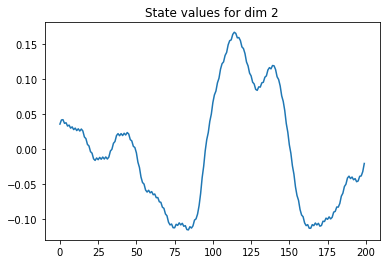

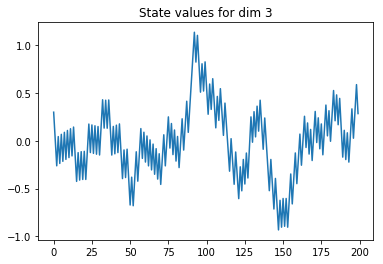

In [11]:
from ast import literal_eval
from utils.misc import *

for data_episode in data_episodes:
    # Convert the state arrays to actual arrays. Pandas stores them as strings, so conversion is neccesary.
    # TODO: fix csv generation so I only need to use literal_eval
    temp = data_episode[state_value_name].apply(lambda x: literal_eval(x.replace('   ', ' ').replace('[ ', '[').replace(' ]', ']').replace('  ', ' ').replace(' ', ',')))
    temp = convert_df_col_to_np(temp)
    
    for dim in range(temp.shape[1]):
        plt.plot([_ for _ in temp[:, dim]])
        plt.title(f'State values for dim {dim}')
        plt.show()

## Conclusion
Notice that the action values are very hard for even a human to read. How many segments count toward a composite action? We will leverage the state values to make this decision in the next notebook.